Regression

In [57]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# other libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [58]:
# Import dataset
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [59]:
# Simple Linear Regression
X= df[['age']]
y= df['fare']

In [60]:
# Finding null values in X and y
X.isnull().sum()/len(X)*100

age    19.86532
dtype: float64

In [61]:
y.isnull().sum()/len(y)*100

0.0

In [62]:
# Replacing null values with mean so that the shape of X and y is same
X = X.fillna(X.mean())

In [63]:
X.isnull().sum()/len(X)*100

age    0.0
dtype: float64

In [64]:
X.shape

(891, 1)

In [65]:
y.shape

(891,)

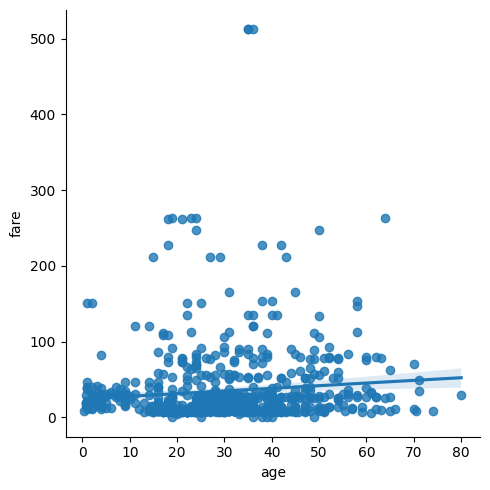

In [66]:
# plotting LM plot
sns.lmplot(x='age', y='fare', data=df)

<AxesSubplot: ylabel='age'>

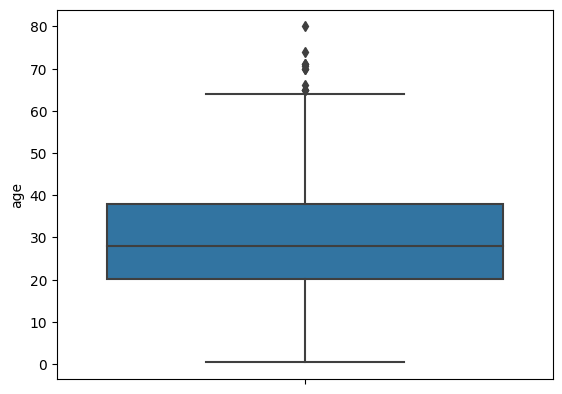

In [67]:
# Removing Outlinears from the plot
sns.boxplot(y='age', data=df)

In [68]:
df = df[(df[('age')]>5) & (df['age']<80)]

<AxesSubplot: ylabel='fare'>

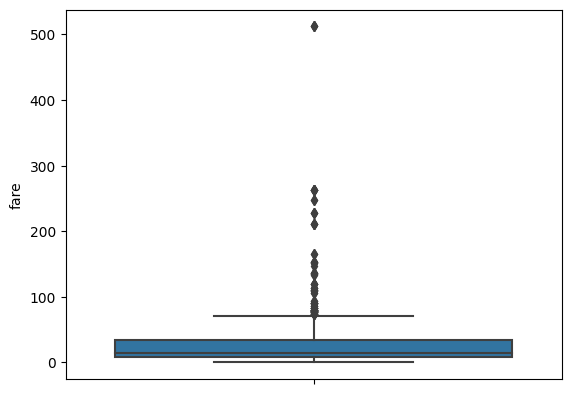

In [69]:
# Now for y
sns.boxplot(y='fare', data=df)

In [70]:
# Call model
model = LinearRegression()

# Fit the model
model.fit(X,y)


LinearRegression()

In [71]:
# Predict
y_pred = model.predict(X)

In [72]:
y_pred = model.predict([[20]])

c:\Users\ff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [74]:
# Model evaluation with metrics
X_train, X_test, y_test, y_train = train_test_split(X, y, test_size=0.2)

In [75]:
X_train.shape

(712, 1)

In [76]:
X_test.shape

(179, 1)

In [78]:
# Now train model on this data
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

ValueError: Found input variables with inconsistent numbers of samples: [712, 179]

In [79]:
# First evaluate prediction model via scatter plot
sns.scatterplot(x=y_test, y=prediction)

NameError: name 'prediction' is not defined

In [80]:
# Then evaluate it via score
model.score(X_test, y_test)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [83]:
# other methods
from sklearn.metrics import mean_squared_error , root_mean_squared_error , r2_score, mean_absolute_error
MSE = mean_squared_error(y_test, prediction)
MAE = mean_absolute_error(y_test, prediction)
RMSE = np.sqrt(mean_squared_error(y_test, prediction))
R2 = r2_score(y_test, prediction)

print ("MSE", MSE)
print ("MAE", MAE)
print ("RMSE", RMSE)
print ("R2", R2)

ImportError: cannot import name 'root_mean_squared_error' from 'sklearn.metrics' (c:\Users\ff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\__init__.py)